In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
from math import sqrt

# TensorFlow related imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Check TensorFlow version (optional)
print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)

# Scikit-learn and Scikeras for model tuning (if used)
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV


TensorFlow version: 2.15.0
Numpy version: 1.26.2


In [3]:
# Change to your file path
file_path_future = 'data/df_daily_future_test.csv' 
file_path_ori = 'data/df_daily_train_valid.csv'

#Get the original and future data sets 
df_ori = pd.read_csv(file_path_ori)
df_30_days_future = pd.read_csv(file_path_future)

# set the index
df_ori = df_ori.set_index('datetime')
df_30_days_future = df_30_days_future.set_index('datetime')

# Delete the last 30 results to predict it using the model in the future
df_30_days_future['total_real_power'] = np.nan


In [4]:
df = df_ori.copy()
df.columns

Index(['total_real_power', 'reactive_power', 'voltage', 'current_intensity',
       'kitchen', 'laundry_room', 'temp_control'],
      dtype='object')

In [5]:
#Let's Examine Correlation between the series
###https://github.com/mikekeith52/scalecast-examples/blob/main/multivariate/multivariate.ipynb


!pip install scalecast
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\alvar\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


In [6]:
f_tot_power = Forecaster(
    y=df['total_real_power'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_reac_power = Forecaster(
    y=df['reactive_power'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_voltage = Forecaster(
    y=df['voltage'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_current = Forecaster(
    y=df['current_intensity'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_kitchen = Forecaster(
    y=df['kitchen'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_laundry = Forecaster(
    y=df['laundry_room'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)
f_temp_control = Forecaster(
    y=df['temp_control'],
    current_dates = df.index,
    test_length = .2,
    future_dates = 30,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True,
)

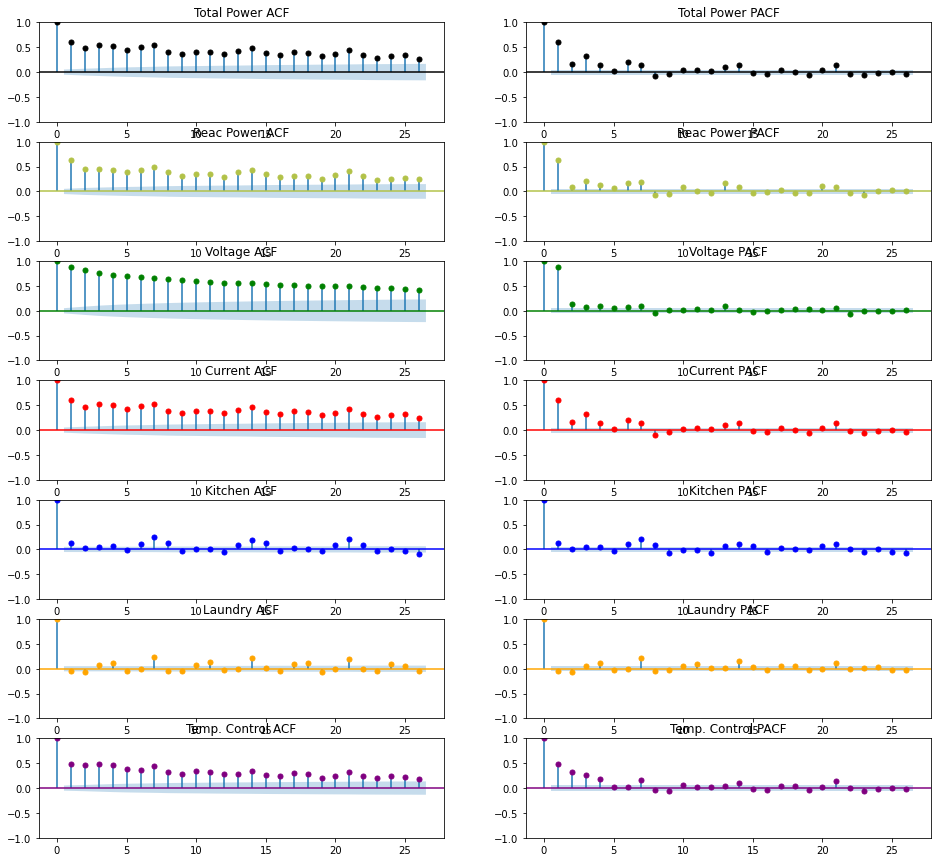

In [7]:
figs, axs = plt.subplots(7, 2,figsize=(16,15))
f_tot_power.plot_acf(
    ax=axs[0,0],
    title='Total Power ACF',
    lags=26,
    color='black'
)
f_tot_power.plot_pacf(
    ax=axs[0,1],
    title='Total Power PACF',
    lags=26,
    color='black',
    method='ywm'
)
f_reac_power.plot_acf(
    ax=axs[1,0],
    title='Reac Power ACF',
    lags=26,
    color='#B2C248'
)
f_reac_power.plot_pacf(
    ax=axs[1,1],
    title='Reac Power PACF',
    lags=26,
    color='#B2C248',
    method='ywm'
)
f_voltage.plot_acf(
    ax=axs[2,0],
    title='Voltage ACF',
    lags=26,
    color='green'
)
f_voltage.plot_pacf(
    ax=axs[2,1],
    title='Voltage PACF',
    lags=26,
    color='green',
    method='ywm'
)
f_current.plot_acf(
    ax=axs[3,0],
    title='Current ACF',
    lags=26,
    color='red'
)
f_current.plot_pacf(
    ax=axs[3,1],
    title='Current PACF',
    lags=26,
    color='red',
    method='ywm'
)
f_kitchen.plot_acf(
    ax=axs[4,0],
    title='Kitchen ACF',
    lags=26,
    color='blue'
)
f_kitchen.plot_pacf(
    ax=axs[4,1],
    title='Kitchen PACF',
    lags=26,
    color='blue',
    method='ywm'
)
f_laundry.plot_acf(
    ax=axs[5,0],
    title='Laundry ACF',
    lags=26,
    color='orange'
)
f_laundry.plot_pacf(
    ax=axs[5,1],
    title='Laundry PACF',
    lags=26,
    color='orange',
    method='ywm'
)
f_temp_control.plot_acf(
    ax=axs[6,0],
    title='Temp. Control ACF',
    lags=26,
    color='purple'
)
f_temp_control.plot_pacf(
    ax=axs[6,1],
    title='Temp. Control PACF',
    lags=26,
    color='purple',
    method='ywm'
)
plt.show()

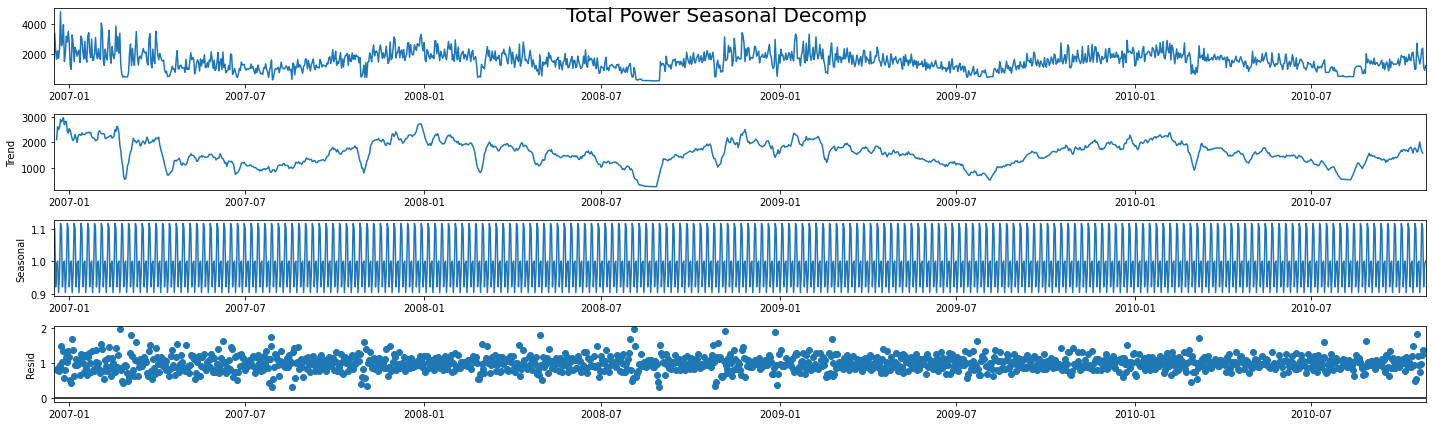

In [8]:
plt.rc("figure",figsize=(20,6))
f_tot_power.seasonal_decompose(model='mul').plot()
plt.suptitle('Total Power Seasonal Decomp',size=20)
plt.show()

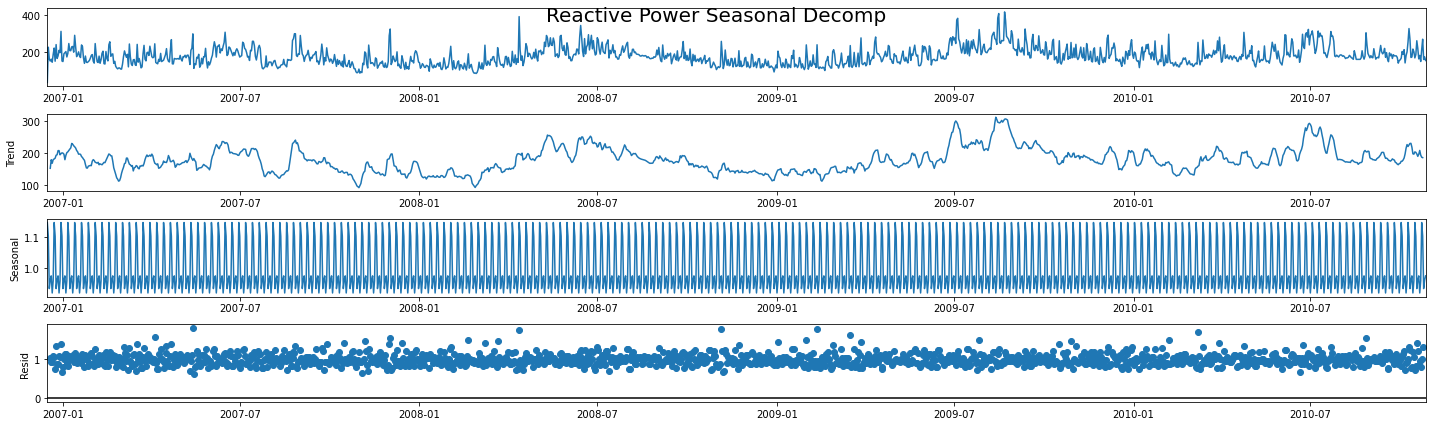

In [9]:
plt.rc("figure",figsize=(20,6))
f_reac_power.seasonal_decompose(model='mul').plot()
plt.suptitle('Reactive Power Seasonal Decomp',size=20)
plt.show()

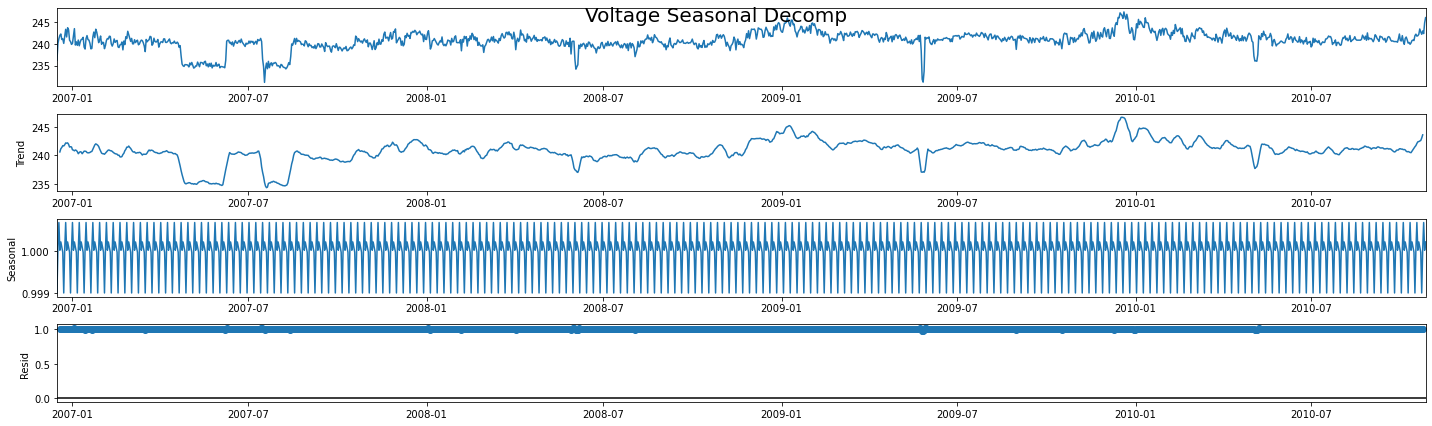

In [10]:
plt.rc("figure",figsize=(20,6))
f_voltage.seasonal_decompose(model='mul').plot()
plt.suptitle('Voltage Seasonal Decomp',size=20)
plt.show()

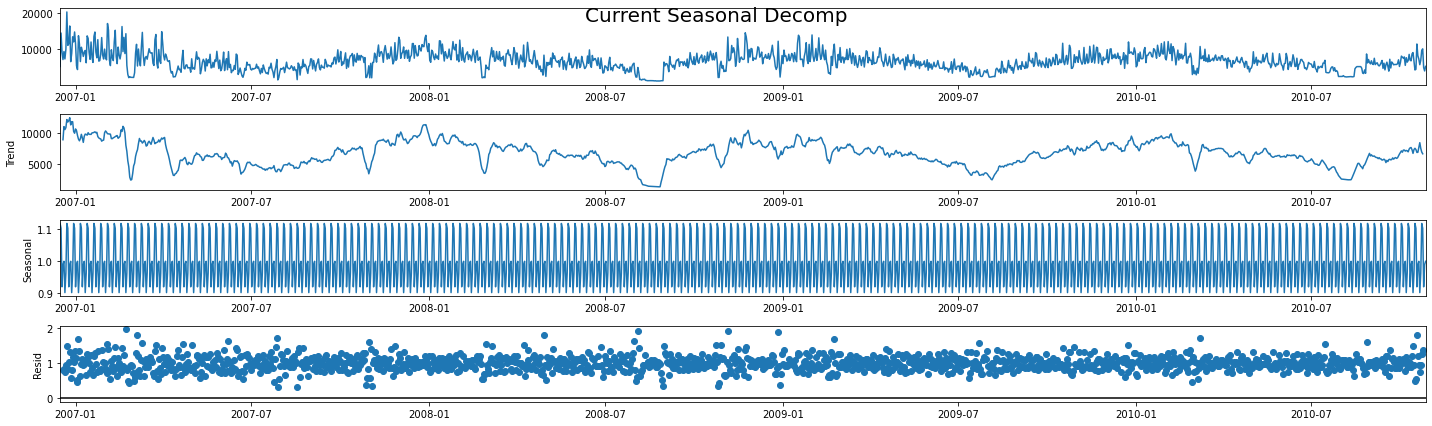

In [11]:
plt.rc("figure",figsize=(20,6))
f_current.seasonal_decompose(model='mul').plot()
plt.suptitle('Current Seasonal Decomp',size=20)
plt.show()

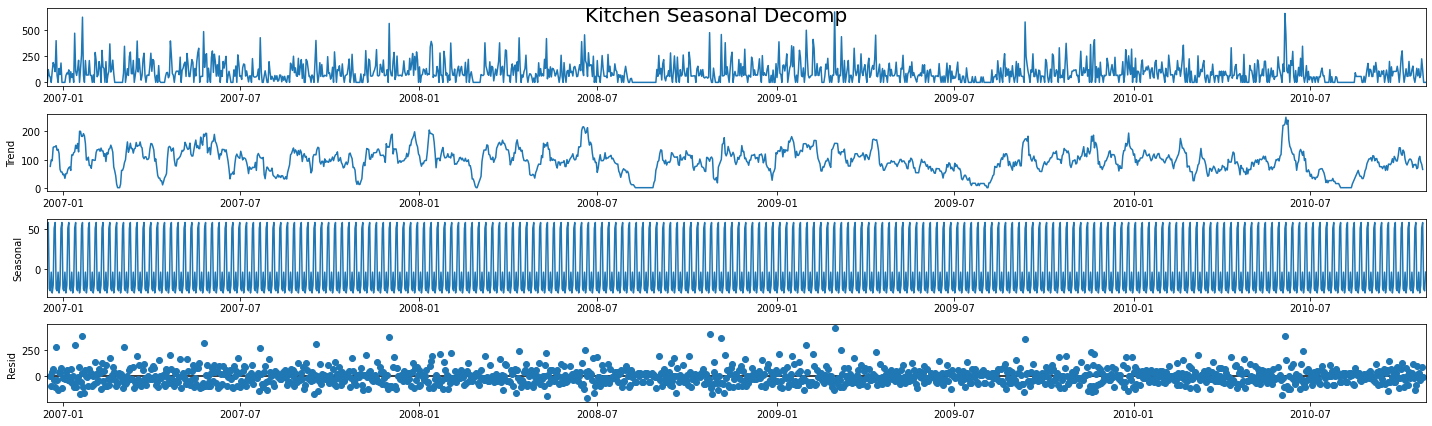

In [12]:
plt.rc("figure",figsize=(20,6))
f_kitchen.seasonal_decompose(model='additive').plot()
plt.suptitle('Kitchen Seasonal Decomp',size=20)
plt.show()

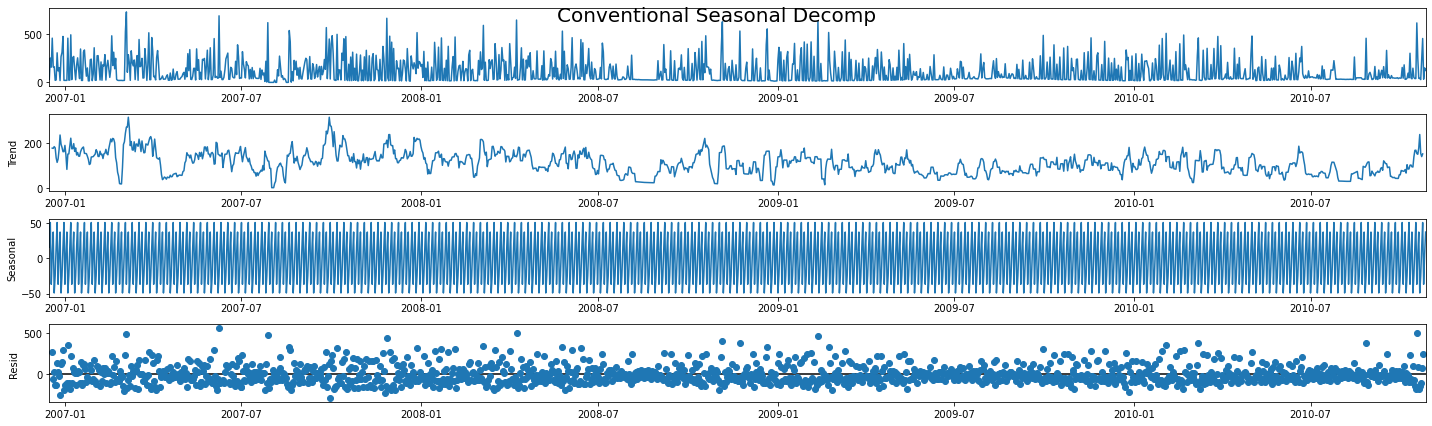

In [13]:
plt.rc("figure",figsize=(20,6))
f_laundry.seasonal_decompose(model='additive').plot()
plt.suptitle('Conventional Seasonal Decomp',size=20)
plt.show()

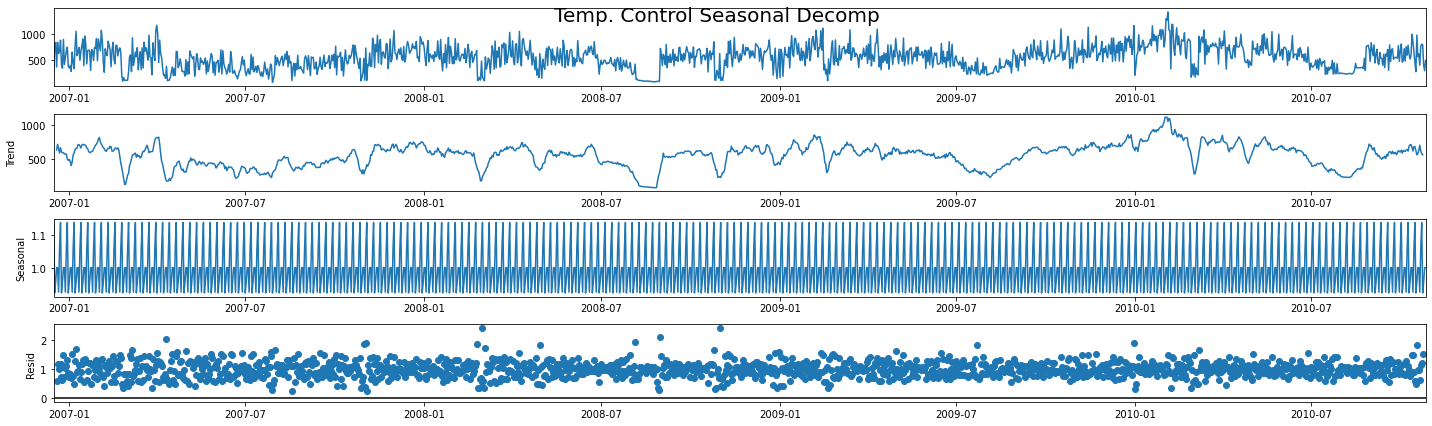

In [14]:
plt.rc("figure",figsize=(20,6))
f_temp_control.seasonal_decompose(model='mul').plot()
plt.suptitle('Temp. Control Seasonal Decomp',size=20)
plt.show()

In [15]:
critical_pval = 0.05
print('-'*100)
print('Conventional Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f_tot_power.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

print('Organic Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f_reac_power.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Conventional Augmented Dickey-Fuller results:
the test-stat value is: -3.68
the p-value is 0.0045
the series is stationary
----------------------------------------------------------------------------------------------------
Organic Augmented Dickey-Fuller results:
the test-stat value is: -3.84
the p-value is 0.0025
the series is stationary
----------------------------------------------------------------------------------------------------


In [16]:
# Fill missing values with the value from previous observation

# define a function topy previous value and fill in the missing observation
def fill_missing(values):
    one_day = 60*24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]

#convert to float
df = df.astype('float32')

# Call function
fill_missing(df.values)

# Check Na values
df.isnull().sum()


total_real_power     0
reactive_power       0
voltage              0
current_intensity    0
kitchen              0
laundry_room         0
temp_control         0
dtype: int64

In [17]:
#Split the dataframe into train and validation sets
test_split=round(len(df)*0.20)

df_for_training = df[:-test_split]
df_for_testing = df[-test_split:]

In [18]:
print(df_for_training.shape)
print(df_for_testing.shape)

(1130, 7)
(282, 7)


In [19]:
df_for_testing.tail()

,total_real_power,reactive_power,voltage,current_intensity,kitchen,laundry_room,temp_control
datetime,,,,,,,
2010-10-23,2293.236084,213.112000,242.243530,9633.200195,224.220001,232.979996,807.900024
2010-10-24,2392.461914,269.612000,243.022568,10039.000000,119.040001,452.579987,795.359985
2010-10-25,1163.291992,159.328003,242.406158,4884.799805,0.000000,32.459999,404.880005
2010-10-26,945.903992,173.266006,244.890945,3960.600098,0.000000,149.279999,299.339996
2010-10-27,1260.277954,153.832001,246.108704,5217.000000,0.000000,123.479996,496.139984


In [21]:
# Let´s scale the dfs
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)

In [22]:
# Converting the series to samples

def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)


trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)


In [23]:
trainX.shape

(1100, 30, 7)

In [24]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1100, 30, 7)
trainY Shape--  (1100,)


In [25]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (252, 30, 7)
testY Shape--  (252,)


In [26]:
from tensorflow.keras.layers import SimpleRNN

In [27]:
#Let´s evaluate the parameters for an RNN

def build_model(optimizer='adam'):
    grid_model = Sequential()
    grid_model.add(SimpleRNN(100, return_sequences=True, input_shape=(30, 7)))
    grid_model.add(SimpleRNN(100))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss='mse', optimizer=optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model, verbose=1)
parameters = {'batch_size': [16, 32, 64, 72],
              'epochs': [15, 20, 25, 30],
              'optimizer': ['adam', 'Adadelta']}

grid_search = GridSearchCV(estimator=grid_model,
                           param_grid=parameters,
                           cv=2)

In [28]:
# Evaluate with grid!
grid_search = grid_search.fit(trainX, trainY)

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/15

35/35 [==============================] - 2s 7ms/step - loss: 0.1938
Epoch 2/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0839
Epoch 3/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0598
Epoch 4/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0455
Epoch 5/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0346
Epoch 6/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0386
Epoch 7/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0248
Epoch 8/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0240
Epoch 9/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0214
Epoch 10/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 11/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 12/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0174
Epoch 13/15
35/35 [===========================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.1926
Epoch 2/15
35/35 [==============================] - 0s 8ms/step - loss: 0.1079
Epoch 3/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0764
Epoch 4/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0548
Epoch 5/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0430
Epoch 6/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 7/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0296
Epoch 8/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0279
Epoch 9/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 10/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0252
Epoch 11/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0220
Epoch 12/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 13/15
35/35 [==============================] - 0s 7ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
35/35 [==============================] - 3s 8ms/step - loss: 0.1395
Epoch 2/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0990
Epoch 3/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0564
Epoch 4/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 5/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 6/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0256
Epoch 7/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 8/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0202
Epoch 9/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 10/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 11/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 12/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 13/15
35/35 [==============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 7ms/step - loss: 0.3099
Epoch 2/15
35/35 [==============================] - 0s 7ms/step - loss: 0.1296
Epoch 3/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0839
Epoch 4/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0559
Epoch 5/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0485
Epoch 6/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0430
Epoch 7/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0341
Epoch 8/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0282
Epoch 9/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0392
Epoch 10/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0279
Epoch 11/15
35/35 [==============================] - 0s 7ms/step - loss: 0.0302
Epoch 12/15
35/35 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 13/15
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.1310
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0947
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0632
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0442
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0302
Epoch 6/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0285
Epoch 7/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 8/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0170
Epoch 9/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 10/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 11/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 12/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 13/20
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 7ms/step - loss: 0.1844
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0951
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0567
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0460
Epoch 5/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0317
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0322
Epoch 8/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 9/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 10/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 11/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 12/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0192
Epoch 13/20
35/35 [==============================] - 0s 7ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 7ms/step - loss: 0.2231
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 0.1061
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0760
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0438
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0349
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0362
Epoch 8/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0276
Epoch 9/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0208
Epoch 10/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 11/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0226
Epoch 12/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 13/20
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.1569
Epoch 2/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0734
Epoch 3/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0592
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0499
Epoch 5/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0343
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0295
Epoch 8/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 9/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0225
Epoch 10/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 11/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 12/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 13/20
35/35 [==============================] - 0s 9ms

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.2211
Epoch 2/25
35/35 [==============================] - 0s 8ms/step - loss: 0.1000
Epoch 3/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0812
Epoch 4/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 5/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0371
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0284
Epoch 7/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0302
Epoch 8/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 9/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0241
Epoch 10/25
35/35 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 11/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 12/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 13/25
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
35/35 [==============================] - 2s 8ms/step - loss: 0.2622
Epoch 2/25
35/35 [==============================] - 0s 8ms/step - loss: 0.1042
Epoch 3/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0975
Epoch 4/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0873
Epoch 5/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0720
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0472
Epoch 7/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0416
Epoch 8/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0400
Epoch 9/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0304
Epoch 10/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0292
Epoch 11/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 12/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0260
Epoch 13/25
35/35 [==============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.1431
Epoch 2/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0674
Epoch 3/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0488
Epoch 4/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0371
Epoch 5/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0285
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0250
Epoch 7/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0255
Epoch 8/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 9/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 10/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 11/25
35/35 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 12/25
35/35 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 13/25
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 2s 8ms/step - loss: 0.2180
Epoch 2/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0805
Epoch 3/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0666
Epoch 4/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0522
Epoch 5/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0461
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0395
Epoch 7/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0353
Epoch 8/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 9/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0336
Epoch 10/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0265
Epoch 11/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0217
Epoch 12/25
35/35 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 13/25
35/35 [==============================] - 0s 8ms/

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
35/35 [==============================] - 2s 8ms/step - loss: 0.1790
Epoch 2/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0743
Epoch 3/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0581
Epoch 4/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0388
Epoch 5/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 6/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0312
Epoch 7/30
35/35 [==============================] - 0s 14ms/step - loss: 0.0285
Epoch 8/30
35/35 [==============================] - 1s 16ms/step - loss: 0.0224
Epoch 9/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0193
Epoch 10/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0187
Epoch 11/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 12/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 13/30
35/35 [=======================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
35/35 [==============================] - 2s 7ms/step - loss: 0.2314
Epoch 2/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0936
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0758
Epoch 4/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 5/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0461
Epoch 6/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0331
Epoch 7/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0323
Epoch 8/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0269
Epoch 9/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 10/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0255
Epoch 11/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 12/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 13/30
35/35 [==============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
35/35 [==============================] - 2s 7ms/step - loss: 0.1849
Epoch 2/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0983
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0671
Epoch 4/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0586
Epoch 5/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0448
Epoch 6/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0381
Epoch 7/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0297
Epoch 8/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 9/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0208
Epoch 10/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0204
Epoch 11/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 12/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 13/30
35/35 [==============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
35/35 [==============================] - 3s 10ms/step - loss: 0.1840
Epoch 2/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0838
Epoch 3/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0692
Epoch 4/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0464
Epoch 5/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 6/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 7/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 8/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0252
Epoch 9/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 10/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 11/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 12/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 13/30
35/35 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
18/18 [==============================] - 2s 12ms/step - loss: 0.3377
Epoch 2/15
18/18 [==============================] - 0s 12ms/step - loss: 0.1170
Epoch 3/15
18/18 [==============================] - 0s 12ms/step - loss: 0.1050
Epoch 4/15
18/18 [==============================] - 0s 14ms/step - loss: 0.0849
Epoch 5/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0555
Epoch 6/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0562
Epoch 7/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0412
Epoch 8/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0424
Epoch 9/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0370
Epoch 10/15
18/18 [==============================] - 0s 14ms/step - loss: 0.0414
Epoch 11/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0426
Epoch 12/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0311
Epoch 13/15
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
18/18 [==============================] - 2s 11ms/step - loss: 0.3986
Epoch 2/15
18/18 [==============================] - 0s 11ms/step - loss: 0.1334
Epoch 3/15
18/18 [==============================] - 0s 11ms/step - loss: 0.1006
Epoch 4/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0767
Epoch 5/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0643
Epoch 6/15
18/18 [==============================] - 0s 14ms/step - loss: 0.0610
Epoch 7/15
18/18 [==============================] - 0s 14ms/step - loss: 0.0426
Epoch 8/15
18/18 [==============================] - 0s 14ms/step - loss: 0.0358
Epoch 9/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 10/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0313
Epoch 11/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0332
Epoch 12/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0306
Epoch 13/15
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
18/18 [==============================] - 2s 12ms/step - loss: 0.2473
Epoch 2/15
18/18 [==============================] - 0s 12ms/step - loss: 0.1134
Epoch 3/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0830
Epoch 4/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0634
Epoch 5/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0496
Epoch 6/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0465
Epoch 7/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0309
Epoch 8/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0335
Epoch 9/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0324
Epoch 10/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0288
Epoch 11/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 12/15
18/18 [==============================] - 0s 13ms/step - loss: 0.0307
Epoch 13/15
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
18/18 [==============================] - 2s 11ms/step - loss: 0.2077
Epoch 2/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0911
Epoch 3/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0687
Epoch 4/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0527
Epoch 5/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0445
Epoch 6/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0364
Epoch 7/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0340
Epoch 8/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0351
Epoch 9/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0328
Epoch 10/15
18/18 [==============================] - 0s 11ms/step - loss: 0.0280
Epoch 11/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0229
Epoch 12/15
18/18 [==============================] - 0s 12ms/step - loss: 0.0211
Epoch 13/15
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
18/18 [==============================] - 2s 11ms/step - loss: 0.2703
Epoch 2/20
18/18 [==============================] - 0s 12ms/step - loss: 0.1005
Epoch 3/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0961
Epoch 4/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0810
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0529
Epoch 6/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0428
Epoch 7/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0332
Epoch 8/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0281
Epoch 9/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0283
Epoch 10/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0286
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0232
Epoch 12/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0198
Epoch 13/20
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
18/18 [==============================] - 3s 14ms/step - loss: 0.2583
Epoch 2/20
18/18 [==============================] - 0s 14ms/step - loss: 0.1265
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0647
Epoch 4/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0684
Epoch 5/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0650
Epoch 6/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0626
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0493
Epoch 8/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0402
Epoch 9/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0335
Epoch 10/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0390
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 12/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0272
Epoch 13/20
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
18/18 [==============================] - 2s 12ms/step - loss: 0.3279
Epoch 2/20
18/18 [==============================] - 0s 12ms/step - loss: 0.1044
Epoch 3/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0799
Epoch 4/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0622
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0506
Epoch 6/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0440
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0406
Epoch 8/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0424
Epoch 9/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0347
Epoch 10/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0295
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0270
Epoch 12/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0238
Epoch 13/20
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
18/18 [==============================] - 3s 12ms/step - loss: 0.2510
Epoch 2/20
18/18 [==============================] - 0s 13ms/step - loss: 0.1307
Epoch 3/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0904
Epoch 4/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0614
Epoch 5/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0498
Epoch 6/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0589
Epoch 7/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0426
Epoch 8/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0369
Epoch 9/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0315
Epoch 10/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0285
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0289
Epoch 12/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0372
Epoch 13/20
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
18/18 [==============================] - 2s 12ms/step - loss: 0.2149
Epoch 2/25
18/18 [==============================] - 0s 12ms/step - loss: 0.1012
Epoch 3/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0710
Epoch 4/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0565
Epoch 5/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0442
Epoch 6/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0468
Epoch 7/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0375
Epoch 8/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0273
Epoch 9/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0272
Epoch 10/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0243
Epoch 11/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0302
Epoch 12/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0294
Epoch 13/25
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
18/18 [==============================] - 2s 12ms/step - loss: 0.2426
Epoch 2/25
18/18 [==============================] - 0s 14ms/step - loss: 0.0936
Epoch 3/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0857
Epoch 4/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0641
Epoch 5/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0502
Epoch 6/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0481
Epoch 7/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0459
Epoch 8/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0287
Epoch 9/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0322
Epoch 10/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0285
Epoch 11/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0277
Epoch 12/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 13/25
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
18/18 [==============================] - 2s 11ms/step - loss: 0.2794
Epoch 2/25
18/18 [==============================] - 0s 12ms/step - loss: 0.1130
Epoch 3/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0768
Epoch 4/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0531
Epoch 5/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0466
Epoch 6/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0385
Epoch 7/25
18/18 [==============================] - 0s 14ms/step - loss: 0.0341
Epoch 8/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0318
Epoch 9/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 10/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 11/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0225
Epoch 12/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0268
Epoch 13/25
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


18/18 [==============================] - 2s 13ms/step - loss: 0.2710
Epoch 2/25
18/18 [==============================] - 0s 12ms/step - loss: 0.1365
Epoch 3/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0827
Epoch 4/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0677
Epoch 5/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0554
Epoch 6/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0437
Epoch 7/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0507
Epoch 8/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0528
Epoch 9/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0360
Epoch 10/25
18/18 [==============================] - 0s 13ms/step - loss: 0.0377
Epoch 11/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0314
Epoch 12/25
18/18 [==============================] - 0s 12ms/step - loss: 0.0292
Epoch 13/25
18/18 [=============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


18/18 [==============================] - 2s 12ms/step - loss: 0.2272
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0970
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0776
Epoch 4/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0549
Epoch 5/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0627
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0463
Epoch 7/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0392
Epoch 8/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0333
Epoch 9/30
18/18 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 10/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0260
Epoch 11/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0287
Epoch 12/30
18/18 [==============================] - 0s 14ms/step - loss: 0.0215
Epoch 13/30
18/18 [=============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
18/18 [==============================] - 2s 12ms/step - loss: 0.3351
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1330
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1012
Epoch 4/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0769
Epoch 5/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0807
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0654
Epoch 7/30
18/18 [==============================] - 0s 15ms/step - loss: 0.0496
Epoch 8/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0412
Epoch 9/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0418
Epoch 10/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0387
Epoch 11/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0315
Epoch 12/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0332
Epoch 13/30
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


18/18 [==============================] - 2s 12ms/step - loss: 0.2466
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0945
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0612
Epoch 4/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0565
Epoch 5/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0512
Epoch 6/30
18/18 [==============================] - 0s 14ms/step - loss: 0.0465
Epoch 7/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0333
Epoch 8/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0275
Epoch 9/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0276
Epoch 10/30
18/18 [==============================] - 0s 14ms/step - loss: 0.0240
Epoch 11/30
18/18 [==============================] - 0s 14ms/step - loss: 0.0208
Epoch 12/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0182
Epoch 13/30
18/18 [=============================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
18/18 [==============================] - 2s 11ms/step - loss: 0.2176
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1030
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0794
Epoch 4/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0600
Epoch 5/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0564
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0381
Epoch 7/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0336
Epoch 8/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0408
Epoch 9/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0306
Epoch 10/30
18/18 [==============================] - 0s 13ms/step - loss: 0.0238
Epoch 11/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0248
Epoch 12/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 13/30
18/18 [==================

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
9/9 [==============================] - 2s 14ms/step - loss: 0.3372
Epoch 2/15
9/9 [==============================] - 0s 16ms/step - loss: 0.1259
Epoch 3/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0895
Epoch 4/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0674
Epoch 5/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0638
Epoch 6/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0505
Epoch 7/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0431
Epoch 8/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0382
Epoch 9/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0332
Epoch 10/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0314
Epoch 11/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0267
Epoch 12/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0244
Epoch 13/15
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
9/9 [==============================] - 3s 15ms/step - loss: 0.3255
Epoch 2/15
9/9 [==============================] - 0s 16ms/step - loss: 0.1299
Epoch 3/15
9/9 [==============================] - 0s 18ms/step - loss: 0.0828
Epoch 4/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0702
Epoch 5/15
9/9 [==============================] - 0s 18ms/step - loss: 0.0685
Epoch 6/15
9/9 [==============================] - 0s 17ms/step - loss: 0.0529
Epoch 7/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0520
Epoch 8/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0390
Epoch 9/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0401
Epoch 10/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0364
Epoch 11/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0365
Epoch 12/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0375
Epoch 13/15
9/9 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
9/9 [==============================] - 2s 14ms/step - loss: 0.6062
Epoch 2/15
9/9 [==============================] - 0s 16ms/step - loss: 0.2281
Epoch 3/15
9/9 [==============================] - 0s 15ms/step - loss: 0.1241
Epoch 4/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0957
Epoch 5/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0848
Epoch 6/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0707
Epoch 7/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0631
Epoch 8/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0622
Epoch 9/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0469
Epoch 10/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0420
Epoch 11/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0420
Epoch 12/15
9/9 [==============================] - 0s 16ms/step - loss: 0.0361
Epoch 13/15
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
9/9 [==============================] - 2s 14ms/step - loss: 0.4621
Epoch 2/15
9/9 [==============================] - 0s 15ms/step - loss: 0.2125
Epoch 3/15
9/9 [==============================] - 0s 15ms/step - loss: 0.1510
Epoch 4/15
9/9 [==============================] - 0s 15ms/step - loss: 0.1208
Epoch 5/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0913
Epoch 6/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0713
Epoch 7/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0589
Epoch 8/15
9/9 [==============================] - 0s 14ms/step - loss: 0.0564
Epoch 9/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0555
Epoch 10/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0462
Epoch 11/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0554
Epoch 12/15
9/9 [==============================] - 0s 15ms/step - loss: 0.0454
Epoch 13/15
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 2s 15ms/step - loss: 0.5984
Epoch 2/20
9/9 [==============================] - 0s 16ms/step - loss: 0.2361
Epoch 3/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1717
Epoch 4/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1226
Epoch 5/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0862
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0738
Epoch 7/20
9/9 [==============================] - 0s 16ms/step - loss: 0.0609
Epoch 8/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0531
Epoch 9/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0439
Epoch 10/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0453
Epoch 11/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0438
Epoch 12/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0359
Epoch 13/20
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 2s 14ms/step - loss: 0.4292
Epoch 2/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1578
Epoch 3/20
9/9 [==============================] - 0s 14ms/step - loss: 0.1323
Epoch 4/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1027
Epoch 5/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0920
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0852
Epoch 7/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0670
Epoch 8/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0537
Epoch 9/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0473
Epoch 10/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0445
Epoch 11/20
9/9 [==============================] - 0s 14ms/step - loss: 0.0394
Epoch 12/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0409
Epoch 13/20
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 2s 15ms/step - loss: 0.4438
Epoch 2/20
9/9 [==============================] - 0s 16ms/step - loss: 0.1846
Epoch 3/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1328
Epoch 4/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0912
Epoch 5/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0785
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0636
Epoch 7/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0539
Epoch 8/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0509
Epoch 9/20
9/9 [==============================] - 0s 16ms/step - loss: 0.0429
Epoch 10/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0438
Epoch 11/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0374
Epoch 12/20
9/9 [==============================] - 0s 16ms/step - loss: 0.0375
Epoch 13/20
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 2s 15ms/step - loss: 0.3125
Epoch 2/20
9/9 [==============================] - 0s 15ms/step - loss: 0.1310
Epoch 3/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0952
Epoch 4/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0566
Epoch 5/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0514
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0415
Epoch 7/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0362
Epoch 8/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0376
Epoch 9/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0334
Epoch 10/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0325
Epoch 11/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0283
Epoch 12/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0288
Epoch 13/20
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
9/9 [==============================] - 2s 14ms/step - loss: 0.4203
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1574
Epoch 3/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1106
Epoch 4/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0764
Epoch 5/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0674
Epoch 6/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0486
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0467
Epoch 8/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0447
Epoch 9/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0380
Epoch 10/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0362
Epoch 11/25
9/9 [==============================] - 0s 14ms/step - loss: 0.0272
Epoch 12/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0296
Epoch 13/25
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 2s 14ms/step - loss: 0.3978
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1798
Epoch 3/25
9/9 [==============================] - 0s 14ms/step - loss: 0.1481
Epoch 4/25
9/9 [==============================] - 0s 14ms/step - loss: 0.1159
Epoch 5/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1088
Epoch 6/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0769
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0648
Epoch 8/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0713
Epoch 9/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0510
Epoch 10/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0424
Epoch 11/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0466
Epoch 12/25
9/9 [==============================] - 0s 14ms/step - loss: 0.0390
Epoch 13/25
9/9 [==============================] - 0s 15ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
9/9 [==============================] - 2s 14ms/step - loss: 0.2360
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0965
Epoch 3/25
9/9 [==============================] - 0s 16ms/step - loss: 0.0839
Epoch 4/25
9/9 [==============================] - 0s 17ms/step - loss: 0.0651
Epoch 5/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0510
Epoch 6/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0469
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0365
Epoch 8/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0337
Epoch 9/25
9/9 [==============================] - 0s 17ms/step - loss: 0.0317
Epoch 10/25
9/9 [==============================] - 0s 18ms/step - loss: 0.0282
Epoch 11/25
9/9 [==============================] - 0s 16ms/step - loss: 0.0236
Epoch 12/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0234
Epoch 13/25
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
9/9 [==============================] - 2s 14ms/step - loss: 0.2906
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1368
Epoch 3/25
9/9 [==============================] - 0s 15ms/step - loss: 0.1123
Epoch 4/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0857
Epoch 5/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0644
Epoch 6/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0586
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0494
Epoch 8/25
9/9 [==============================] - 0s 14ms/step - loss: 0.0474
Epoch 9/25
9/9 [==============================] - 0s 14ms/step - loss: 0.0478
Epoch 10/25
9/9 [==============================] - 0s 14ms/step - loss: 0.0340
Epoch 11/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0316
Epoch 12/25
9/9 [==============================] - 0s 15ms/step - loss: 0.0281
Epoch 13/25
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 2s 14ms/step - loss: 0.3843
Epoch 2/30
9/9 [==============================] - 0s 15ms/step - loss: 0.1355
Epoch 3/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0978
Epoch 4/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0757
Epoch 5/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0530
Epoch 6/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0455
Epoch 7/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0405
Epoch 8/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0360
Epoch 9/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0372
Epoch 10/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0354
Epoch 11/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0321
Epoch 12/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0348
Epoch 13/30
9/9 [==============================] - 0s 15ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
9/9 [==============================] - 3s 19ms/step - loss: 0.3142
Epoch 2/30
9/9 [==============================] - 0s 18ms/step - loss: 0.1291
Epoch 3/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0929
Epoch 4/30
9/9 [==============================] - 0s 17ms/step - loss: 0.0687
Epoch 5/30
9/9 [==============================] - 0s 17ms/step - loss: 0.0566
Epoch 6/30
9/9 [==============================] - 0s 17ms/step - loss: 0.0576
Epoch 7/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0442
Epoch 8/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0460
Epoch 9/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0395
Epoch 10/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0359
Epoch 11/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0313
Epoch 12/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0311
Epoch 13/30
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
9/9 [==============================] - 2s 14ms/step - loss: 0.2386
Epoch 2/30
9/9 [==============================] - 0s 16ms/step - loss: 0.1155
Epoch 3/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0848
Epoch 4/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0585
Epoch 5/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0504
Epoch 6/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0428
Epoch 7/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0350
Epoch 8/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0260
Epoch 9/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0281
Epoch 10/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0232
Epoch 11/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0253
Epoch 12/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0203
Epoch 13/30
9/9 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
9/9 [==============================] - 2s 16ms/step - loss: 0.4632
Epoch 2/30
9/9 [==============================] - 0s 16ms/step - loss: 0.1939
Epoch 3/30
9/9 [==============================] - 0s 16ms/step - loss: 0.1557
Epoch 4/30
9/9 [==============================] - 0s 16ms/step - loss: 0.1226
Epoch 5/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0861
Epoch 6/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0800
Epoch 7/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0584
Epoch 8/30
9/9 [==============================] - 0s 17ms/step - loss: 0.0481
Epoch 9/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0453
Epoch 10/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0446
Epoch 11/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0438
Epoch 12/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0368
Epoch 13/30
9/9 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
8/8 [==============================] - 2s 16ms/step - loss: 0.3397
Epoch 2/15
8/8 [==============================] - 0s 18ms/step - loss: 0.1364
Epoch 3/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0903
Epoch 4/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0772
Epoch 5/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0605
Epoch 6/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0498
Epoch 7/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0523
Epoch 8/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0467
Epoch 9/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0377
Epoch 10/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0328
Epoch 11/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0289
Epoch 12/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0310
Epoch 13/15
8/8 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 14ms/step - loss: 0.5262
Epoch 2/15
8/8 [==============================] - 0s 15ms/step - loss: 0.1981
Epoch 3/15
8/8 [==============================] - 0s 16ms/step - loss: 0.1370
Epoch 4/15
8/8 [==============================] - 0s 16ms/step - loss: 0.1014
Epoch 5/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0964
Epoch 6/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0775
Epoch 7/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0631
Epoch 8/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0566
Epoch 9/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0496
Epoch 10/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0453
Epoch 11/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0422
Epoch 12/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0370
Epoch 13/15
8/8 [==============================] - 0s 16ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 15ms/step - loss: 0.3823
Epoch 2/15
8/8 [==============================] - 0s 16ms/step - loss: 0.1603
Epoch 3/15
8/8 [==============================] - 0s 16ms/step - loss: 0.1202
Epoch 4/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0953
Epoch 5/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0818
Epoch 6/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0595
Epoch 7/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0487
Epoch 8/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0493
Epoch 9/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0483
Epoch 10/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0390
Epoch 11/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0363
Epoch 12/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0324
Epoch 13/15
8/8 [==============================] - 0s 16ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
8/8 [==============================] - 2s 16ms/step - loss: 0.4022
Epoch 2/15
8/8 [==============================] - 0s 17ms/step - loss: 0.1877
Epoch 3/15
8/8 [==============================] - 0s 17ms/step - loss: 0.1155
Epoch 4/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0969
Epoch 5/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0647
Epoch 6/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0612
Epoch 7/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0544
Epoch 8/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0427
Epoch 9/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0413
Epoch 10/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0407
Epoch 11/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0306
Epoch 12/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0350
Epoch 13/15
8/8 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 15ms/step - loss: 0.5625
Epoch 2/20
8/8 [==============================] - 0s 16ms/step - loss: 0.1750
Epoch 3/20
8/8 [==============================] - 0s 16ms/step - loss: 0.1377
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0912
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0751
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0615
Epoch 7/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0584
Epoch 8/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0409
Epoch 9/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0398
Epoch 10/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0373
Epoch 11/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0378
Epoch 12/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0356
Epoch 13/20
8/8 [==============================] - 0s 16ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
8/8 [==============================] - 2s 14ms/step - loss: 0.3642
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1640
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1173
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0835
Epoch 5/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0847
Epoch 6/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0681
Epoch 7/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0574
Epoch 8/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0568
Epoch 9/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0481
Epoch 10/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0412
Epoch 11/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0348
Epoch 12/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0316
Epoch 13/20
8/8 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
8/8 [==============================] - 2s 15ms/step - loss: 0.6485
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1826
Epoch 3/20
8/8 [==============================] - 0s 16ms/step - loss: 0.1459
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1211
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0991
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0789
Epoch 7/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0736
Epoch 8/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0695
Epoch 9/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0594
Epoch 10/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0467
Epoch 11/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0458
Epoch 12/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0473
Epoch 13/20
8/8 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
8/8 [==============================] - 2s 15ms/step - loss: 0.3371
Epoch 2/20
8/8 [==============================] - 0s 16ms/step - loss: 0.1627
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1136
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0742
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0703
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0700
Epoch 7/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0558
Epoch 8/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0492
Epoch 9/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0484
Epoch 10/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0380
Epoch 11/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0312
Epoch 12/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0362
Epoch 13/20
8/8 [==============================] - 0s 15ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 14ms/step - loss: 0.6235
Epoch 2/25
8/8 [==============================] - 0s 15ms/step - loss: 0.1959
Epoch 3/25
8/8 [==============================] - 0s 15ms/step - loss: 0.1541
Epoch 4/25
8/8 [==============================] - 0s 15ms/step - loss: 0.1073
Epoch 5/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0775
Epoch 6/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0671
Epoch 7/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0653
Epoch 8/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0545
Epoch 9/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0496
Epoch 10/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0445
Epoch 11/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0376
Epoch 12/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0496
Epoch 13/25
8/8 [==============================] - 0s 15ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 17ms/step - loss: 0.3650
Epoch 2/25
8/8 [==============================] - 0s 17ms/step - loss: 0.1650
Epoch 3/25
8/8 [==============================] - 0s 17ms/step - loss: 0.1065
Epoch 4/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0785
Epoch 5/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0689
Epoch 6/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0596
Epoch 7/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0564
Epoch 8/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0513
Epoch 9/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0473
Epoch 10/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0490
Epoch 11/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0485
Epoch 12/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0415
Epoch 13/25
8/8 [==============================] - 0s 16ms/step - loss: 

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
8/8 [==============================] - 3s 15ms/step - loss: 0.3623
Epoch 2/25
8/8 [==============================] - 0s 16ms/step - loss: 0.1722
Epoch 3/25
8/8 [==============================] - 0s 16ms/step - loss: 0.1026
Epoch 4/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0947
Epoch 5/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0716
Epoch 6/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0578
Epoch 7/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0453
Epoch 8/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0410
Epoch 9/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0362
Epoch 10/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0318
Epoch 11/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0296
Epoch 12/25
8/8 [==============================] - 0s 19ms/step - loss: 0.0311
Epoch 13/25
8/8 [==============================] - 0s 17ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
8/8 [==============================] - 2s 15ms/step - loss: 0.2971
Epoch 2/25
8/8 [==============================] - 0s 16ms/step - loss: 0.1104
Epoch 3/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0824
Epoch 4/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0738
Epoch 5/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0585
Epoch 6/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0475
Epoch 7/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0453
Epoch 8/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0390
Epoch 9/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0344
Epoch 10/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0334
Epoch 11/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0315
Epoch 12/25
8/8 [==============================] - 0s 16ms/step - loss: 0.0231
Epoch 13/25
8/8 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
8/8 [==============================] - 2s 16ms/step - loss: 0.4408
Epoch 2/30
8/8 [==============================] - 0s 16ms/step - loss: 0.1526
Epoch 3/30
8/8 [==============================] - 0s 17ms/step - loss: 0.1208
Epoch 4/30
8/8 [==============================] - 0s 17ms/step - loss: 0.1015
Epoch 5/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0736
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0591
Epoch 7/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0445
Epoch 8/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0401
Epoch 9/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0339
Epoch 10/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0289
Epoch 11/30
8/8 [==============================] - 0s 20ms/step - loss: 0.0309
Epoch 12/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0275
Epoch 13/30
8/8 [==============================] - 0s 17ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
8/8 [==============================] - 2s 16ms/step - loss: 0.4308
Epoch 2/30
8/8 [==============================] - 0s 16ms/step - loss: 0.1244
Epoch 3/30
8/8 [==============================] - 0s 16ms/step - loss: 0.1064
Epoch 4/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0765
Epoch 5/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0697
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0642
Epoch 7/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0545
Epoch 8/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0529
Epoch 9/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0422
Epoch 10/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0427
Epoch 11/30
8/8 [==============================] - 0s 15ms/step - loss: 0.0461
Epoch 12/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0439
Epoch 13/30
8/8 [==============================] - 0s 17ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
8/8 [==============================] - 2s 14ms/step - loss: 0.2754
Epoch 2/30
8/8 [==============================] - 0s 15ms/step - loss: 0.1509
Epoch 3/30
8/8 [==============================] - 0s 15ms/step - loss: 0.1079
Epoch 4/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0721
Epoch 5/30
8/8 [==============================] - 0s 15ms/step - loss: 0.0615
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0508
Epoch 7/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0529
Epoch 8/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0438
Epoch 9/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0438
Epoch 10/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0374
Epoch 11/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0359
Epoch 12/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0327
Epoch 13/30
8/8 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
8/8 [==============================] - 2s 17ms/step - loss: 0.4015
Epoch 2/30
8/8 [==============================] - 0s 16ms/step - loss: 0.1468
Epoch 3/30
8/8 [==============================] - 0s 17ms/step - loss: 0.1097
Epoch 4/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0880
Epoch 5/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0642
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0621
Epoch 7/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0503
Epoch 8/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0450
Epoch 9/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0385
Epoch 10/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0388
Epoch 11/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0358
Epoch 12/30
8/8 [==============================] - 0s 16ms/step - loss: 0.0415
Epoch 13/30
8/8 [==============================] - 0s 16ms/st

c:\Users\alvar\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
35/35 [==============================] - 2s 11ms/step - loss: 0.1536
Epoch 2/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0742
Epoch 3/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0462
Epoch 4/30
35/35 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 5/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 6/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0234
Epoch 7/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0227
Epoch 8/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 9/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0197
Epoch 10/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0175
Epoch 11/30
35/35 [==============================] - 0s 13ms/step - loss: 0.0176
Epoch 12/30
35/35 [==============================] - 0s 12ms/step - loss: 0.0176
Epoch 13/30
35/35 [==================

In [29]:
#These are the best parameters
grid_search.best_params_

{'batch_size': 32, 'epochs': 30, 'optimizer': 'adam'}

In [30]:
# This is my best model

my_model = grid_search.best_estimator_

In [31]:
# Let's predict
prediction = my_model.predict(testX)

8/8 [==============================] - 0s 5ms/step


In [32]:
prediction.shape

(252,)

In [ ]:
# print("prediction\n", prediction)
# print("\nPrediction Shape-",prediction.shape)

In [33]:
# Let's reescale

new_array=np.array(prediction).reshape(-1,1)
prediction_copies_array = np.repeat(new_array,7, axis=-1)

pred = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),7)))[:,0]

In [34]:
# Let's get the original values
original_copies_array = np.repeat(testY,7, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),7)))[:,0]

In [ ]:
# print("Pred Values-- " ,pred.shape)
# print("\nOriginal Values-- ",original)

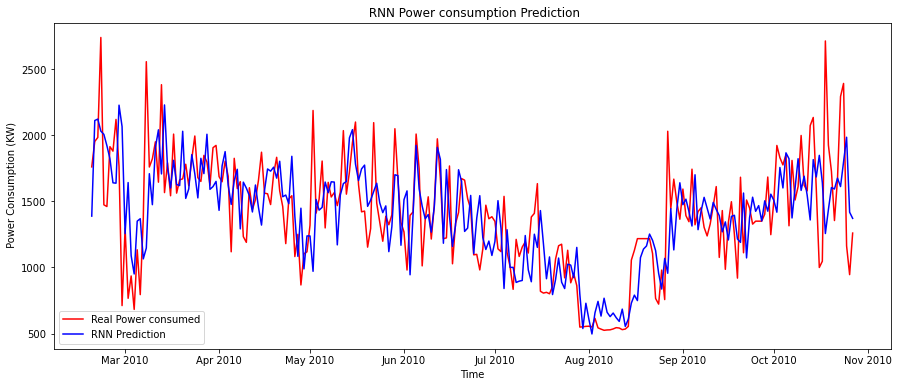

In [35]:
# Let's plot the results

df_for_testing.index = pd.to_datetime(df_for_testing.index)

plt.figure(figsize=(15, 6))
plt.plot(df_for_testing.index[30:], original, color = 'red', label = 'Real Power consumed')
plt.plot(df_for_testing.index[30:], pred, color = 'blue', label = 'RNN Prediction')

plt.title(' RNN Power consumption Prediction')
plt.xlabel('Time')
plt.ylabel(' Power Consumption (KW)')
plt.legend()

# Formating X-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.show()

Compara reseultado com o test - calculando erro

In [36]:
from sklearn.metrics import mean_absolute_error

# Let's compute the error between the prediction and the original value for the test set

mae = mean_absolute_error(original, pred)

# Mean error
print(f'Mean error: {mae}')

Mean error: 246.81040954589844


In [37]:
from sklearn.metrics import mean_squared_error

# Let's compute the RMSE between the prediction and the original value for the test set
# calculate RMSE
rmse = sqrt(mean_squared_error(original, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 342.303


In [38]:
# Now let's predict next 30 days

# We had already defined this future 30 days
df_30_days_future.shape
df_30_days_past = df.iloc[-30:,:]


In [39]:
df_30_days_future.head()

,total_real_power,reactive_power,voltage,current_intensity,kitchen,laundry_room,temp_control
datetime,,,,,,,
2010-10-28,NaN,187.240,246.25390,6048.2,66.180000,157.620000,545.22
2010-10-29,NaN,195.720,245.74310,5057.2,64.500000,43.559998,234.66
2010-10-30,NaN,195.320,243.26736,8969.8,141.180000,36.840000,918.18
2010-10-31,NaN,208.082,245.49527,6098.6,85.799995,40.680000,335.34
2010-11-01,NaN,187.086,246.37961,5670.2,0.000000,38.040000,524.76


In [40]:
# Scale the past 30 days and the parameters for the next 30 days

old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_30_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)


In [41]:
full_df.shape

(60, 7)

In [42]:
full_df_scaled_array=full_df.values

In [43]:
all_data = []
time_step = 30
for i in range(time_step, len(full_df_scaled_array)):
    data_x = []
    data_x.append(full_df_scaled_array[i-time_step: i, 0:full_df_scaled_array.shape[1]])
    data_x = np.array(data_x, dtype=np.float32)
    prediction = my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i, 0] = prediction

1/1 [==============================] - 0s 24ms/step


In [44]:
# Reverse the scale for predictions
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,7, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),7)))[:,0]

In [45]:
y_pred_future_30_days

array([1268.3973, 1184.4819, 1630.9965, 1694.0304, 1498.5636, 1482.602 ,
       1501.8807, 1488.033 ,  932.4918, 1408.0352, 1996.5419, 2155.3013,
       1671.7821, 1465.0996, 1059.9031, 1242.3644, 2102.7554, 2176.0303,
       1909.6526, 1913.5905, 1777.5681, 1485.6675, 1352.998 , 1677.88  ,
       2045.5382, 1994.3721, 1759.2584, 1816.46  , 1189.3182, 1606.9084],
      dtype=float32)

In [46]:
df_check = pd.read_csv('data/df_daily_future_test.csv')
df_check = df_check.set_index('datetime')

In [47]:
from sklearn.metrics import mean_squared_error

# Let's compute the RMSE and MAE between the prediction and the original value for the test set


# Mean Absolute error

#mae_array = np.abs(y_pred_future_30_days, df_check.iloc[:,0])
#mae_mean = np.mean(mae_array)
mae = mean_absolute_error(y_pred_future_30_days, df_check.iloc[:,0])
print(f'Mean absolute error: {mae}')




# calculate RMSE
rmse = sqrt(mean_squared_error(y_pred_future_30_days, df_check.iloc[:,0]))
print('Test RMSE: %.3f' % rmse)

Mean absolute error: 342.21276946614586
Test RMSE: 443.023
